## 비지도 학습 클러스터링 + 추출한 음파 특징값 csv 파일 활용하여 음원 장르 분석 모델 구상하기

### 필요한 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.cluster

### 추출한 음파 특징값 csv 파일 불러오기

In [6]:
file_path1 = "feature_result_classic.csv"
file_path2 = "feature_result_songs.csv"
df1 = pd.read_csv(file_path1, index_col=0)
df2 = pd.read_csv(file_path2, index_col=0)
df_soundwave = pd.concat([df1,df2], axis=0)
df_soundwave.tail()

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
1112,사랑이란 멜로는 없어-전상근_30.wav,5871.307449,652.686946,1887.116110,712.621507,8.066007,2.436668,9614.575195,872.094727,3723.044154,...,13.192509,-0.321352,0.215080,42.287186,-27.373474,3.863741,11.266271,-0.175128,0.234996,123.046875
1113,가슴 아파도-환희_30.wav,5059.006502,614.032706,1580.992107,662.418900,3.350908,1.530171,8021.118164,818.261719,3395.287802,...,9.743752,1.170244,-0.010512,21.113426,-31.827812,-2.086408,8.925055,0.275026,-0.396901,129.199219
1114,사랑은...향기를 남기고-테이_30.wav,6036.061736,613.475149,2320.967429,1029.832063,1.733287,1.064968,9130.078125,904.394531,5091.960876,...,9.238767,1.228230,0.776293,35.749740,-20.205238,2.707291,9.719677,-0.142164,0.365823,129.199219
1115,사랑이 다른 사랑으로 잊혀지네-하림_30.wav,5820.610782,422.024925,1626.044880,647.161001,6.830122,1.807256,8602.514648,495.263672,3756.785617,...,8.189332,0.012250,0.235152,38.079872,-23.583622,0.926317,9.150774,0.479233,0.305111,89.102909
1116,추억은 만남보다 이별에 남아-정동하_30.wav,4861.846994,773.887171,2287.558718,504.164479,2.447677,0.767659,9065.478516,1173.559570,5475.500224,...,10.541800,1.533369,0.815030,53.283740,-38.499653,0.932982,12.160453,0.633492,0.256196,135.999178


In [16]:
df1.shape   # classic 곡 갯수 : 164개

(164, 194)

In [17]:
df2.shape   # youtube 무작위 다운로드 곡 갯수 : 1117개

(1117, 194)

### 표준화(normalize) 하기

In [11]:
# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
df_scaler = df_soundwave.iloc[:, 1:]
scaler.fit(df_scaler)
df_scaled = scaler.transform(df_scaler)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
columns = df_soundwave.columns[1:] # 밑에 변환할 때 리스트 값으로 넣어줘야함 확인하고 넣자.
df_sw_scaled = pd.DataFrame(data=df_scaled, columns=columns)

In [12]:
df_sw_scaled

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,-3.181240,-0.752767,-2.494953,-2.663727,-0.930937,-1.630542,-4.364415,-0.627392,-2.492766,-2.708036,...,-0.546020,-1.185851,-0.138022,-0.919828,0.928904,-0.311810,-0.258104,-1.554961,-0.263489,0.597265
1,-1.026222,-0.519663,-1.682162,-1.412061,2.127646,1.684882,-0.666768,-0.488377,-1.742374,-1.303822,...,-0.904864,-0.889102,0.609182,-0.965069,-0.677116,-1.159915,-0.086288,0.263326,-1.568666,-0.024706
2,-3.086956,-0.185177,-2.223253,-2.662263,-0.819940,-0.765783,-3.981003,-0.009550,-2.137709,-2.741053,...,-1.907611,0.282665,-0.903039,-2.062994,0.619232,-0.993974,-1.249207,-1.185935,-0.835384,-0.024706
3,-2.494263,-0.152285,-1.383827,-1.972077,-0.946699,-1.295025,-3.435129,-0.164010,-1.563925,-1.980811,...,1.866298,-0.119980,1.080142,1.687635,-1.471438,0.787821,1.775524,0.054446,0.535262,-0.024706
4,-2.756187,-0.579157,-2.388263,-2.313889,0.129909,0.754244,-3.350649,-0.704622,-2.497600,-2.507336,...,-0.350217,-0.543091,-0.373848,-1.578107,-2.419642,-1.891777,-0.041250,0.516612,-1.205436,-0.538508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,0.322191,0.118619,-0.165258,-0.107864,1.236360,1.621074,0.496463,-0.086780,-0.383413,0.106511,...,1.978642,-1.042981,0.131273,1.022225,0.035144,0.850875,0.900009,-0.853997,0.173147,-0.024706
1277,-0.249071,-0.008473,-0.714089,-0.311817,0.012487,0.400866,-0.465315,-0.164010,-0.628073,0.200960,...,0.283275,1.266349,-0.522426,-1.187915,-0.572934,-0.689645,-0.205829,-0.159764,-1.649103,0.270730
1278,0.438056,-0.010306,0.612567,1.180839,-0.407390,-0.225329,0.204031,-0.040442,0.638445,0.616766,...,0.035030,1.356123,1.757498,0.339839,1.013706,0.551465,0.169499,-0.803159,0.550422,0.270730
1279,0.286538,-0.639780,-0.633316,-0.373804,0.915568,0.773841,-0.114396,-0.627392,-0.358226,-0.072257,...,-0.480859,-0.526489,0.189436,0.583061,0.552511,0.090363,-0.099214,0.155167,0.375341,-1.654699


### PCA 변환 - 차원축소 
(다른 방법으로 차원 축소 가능하니.. 추후 찾아보기)

In [13]:
pca = PCA(n_components=2)
pca.fit(df_sw_scaled)
df_sw_pca = pca.transform(df_sw_scaled)

In [14]:
pca_columns=['pca','pca_array']
sw_pca = pd.DataFrame(df_sw_pca,columns=pca_columns)
sw_pca

,pca,pca_array
0,14.328004,2.934548
1,9.084465,6.025806
2,16.662021,-4.372869
3,6.723121,13.086775
4,14.257367,6.673632
...,...,...
1276,0.577911,3.721323
1277,3.614430,3.753494
1278,-0.832073,-0.181168
1279,3.145734,-2.016833


### 시각화 하기
- 데이터셋 분포 확인 (matplotlib)

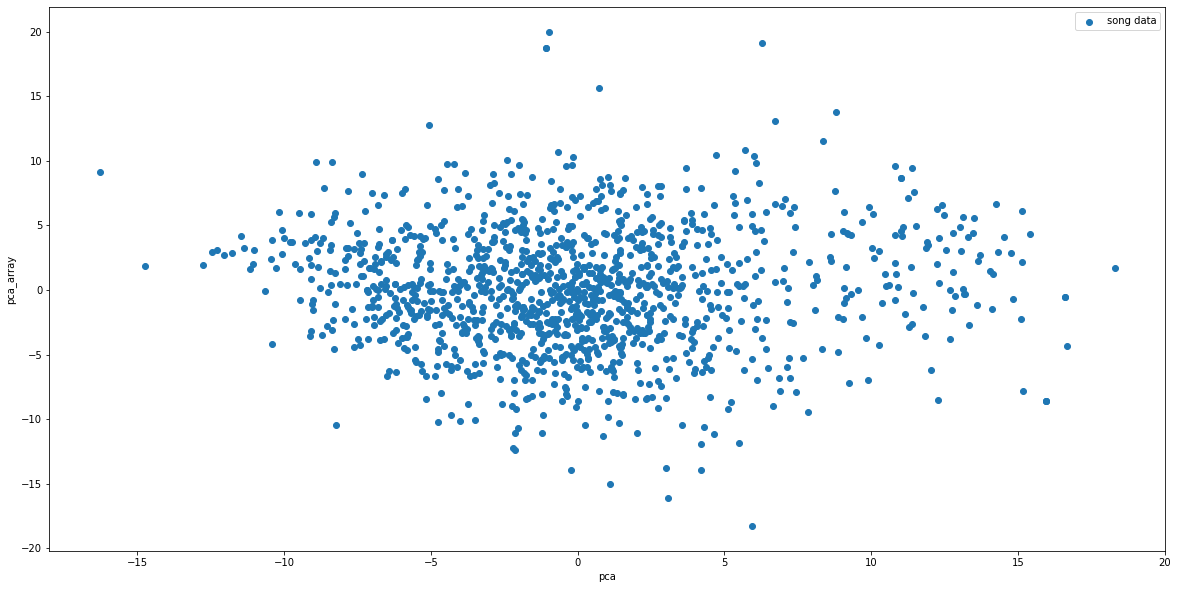

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(sw_pca['pca'], sw_pca['pca_array'], label='song data')
plt.legend(loc = 'best')
plt.xlabel('pca')
plt.ylabel('pca_array')
plt.show()

### Kmeans 알고리즘으로 데이터 분류하기
- n_clusters : 10 (군집화 갯수)
    - Music Genre : ~~~~~~~
- init : kmeans++ (k평균++ 알고리즘)
- n_init : 10 (각기 다른 랜덤한 센트로이드에서 독립적으로 몇 번 실행하여 가장 낮은 제곱오차합)
- max_iter = 300 (최대 몇 번을 반복할 것인지
- tol = 1e-04 (허용 오차값) 
- random_state = 0

In [20]:
#from sklearn.cluster import KMeans

km_model = KMeans(init='k-means++', n_clusters=10, random_state=42)
km_model.fit(sw_pca)

KMeans(n_clusters=10, random_state=42)

In [21]:
df_soundwave['cluster'] = km_model.fit_predict(sw_pca)

In [23]:
df_soundwave

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster
0,바흐: 오르간 소나타 4번: 2. Andante [Adagio]...,889.629793,387.660859,587.670196,83.502671,-0.283733,0.021031,1561.157227,495.263672,897.277908,...,-0.413632,0.122146,23.681774,-20.826439,-0.627045,8.814383,-0.629646,0.083585,135.999178,9
1,"아델라이데-Matthias Goerne, Jan Lisiecki_30.wav",3953.942417,458.557699,1041.024897,391.596881,11.499779,2.484071,7687.353516,592.163086,1902.530162,...,-0.221962,0.380008,23.248352,-32.590973,-3.902793,9.178140,0.549365,-0.369008,123.046875,8
2,Richter : On The Nature Of Daylight (Entropy)-...,1023.696371,560.289408,739.217895,83.863104,0.143893,0.663463,2196.386719,925.927734,1372.925031,...,0.534883,-0.141862,12.729925,-23.094868,-3.261856,6.716077,-0.390363,-0.114729,123.046875,9
3,Bruckner: 브루크너: Os justi meditabitur sapie...,1866.471489,570.293258,1207.428510,253.750303,-0.344460,0.270288,3100.781250,818.261719,2141.587050,...,0.274815,0.542537,48.662003,-38.409603,3.620200,13.119859,0.413923,0.360566,123.046875,8
4,Schubert: 슈베르트: 환상곡 다장조 '방랑ᄌ...,1494.030222,440.462921,647.179651,169.614236,3.803288,1.792697,3240.747070,441.430664,890.802947,...,0.001527,0.040762,17.375282,-45.355450,-6.729559,9.273493,0.713600,-0.243051,112.347147,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,사랑이란 멜로는 없어-전상근_30.wav,5871.307449,652.686946,1887.116110,712.621507,8.066007,2.436668,9614.575195,872.094727,3723.044154,...,-0.321352,0.215080,42.287186,-27.373474,3.863741,11.266271,-0.175128,0.234996,123.046875,4
1113,가슴 아파도-환희_30.wav,5059.006502,614.032706,1580.992107,662.418900,3.350908,1.530171,8021.118164,818.261719,3395.287802,...,1.170244,-0.010512,21.113426,-31.827812,-2.086408,8.925055,0.275026,-0.396901,129.199219,4
1114,사랑은...향기를 남기고-테이_30.wav,6036.061736,613.475149,2320.967429,1029.832063,1.733287,1.064968,9130.078125,904.394531,5091.960876,...,1.228230,0.776293,35.749740,-20.205238,2.707291,9.719677,-0.142164,0.365823,129.199219,1
1115,사랑이 다른 사랑으로 잊혀지네-하림_30.wav,5820.610782,422.024925,1626.044880,647.161001,6.830122,1.807256,8602.514648,495.263672,3756.785617,...,0.012250,0.235152,38.079872,-23.583622,0.926317,9.150774,0.479233,0.305111,89.102909,1


In [25]:
plt.figure(figsize = (8, 8))

for i in range(10):
    plt.scatter(x, y, 'Music Genre(1~10)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('Music Genre Classification'%k , size = 15)
plt.xlabel('songs', size = 12)
plt.ylabel('genre', size = 12)
plt.show()

KeyError: ignored

<Figure size 576x576 with 0 Axes>